<h1><strong>Trabajo grupal Introducción a la Inteligencia Artificial </strong></h1>

<h2>Paper:</h2> 
<h3>Deep-CAPTCHA: a deep learning based CAPTCHA solver for vulnerability assessment</h3>

<h3>Tabla de Contenidos</h3>
<div>
    <ul>
        <li>
            <span>
                <a href="#ambiente">
                    <span>1&nbsp;&nbsp;</span>
                    <strong>AMBIENTE DE PRUEBA</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#paper">
                    <span>2&nbsp;&nbsp;</span>
                    <strong>PAPER CIENTÍFICO</strong>
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#implementacion">
                    <span>3.&nbsp;&nbsp;</span>
                    <strong>IMPLEMENTACIÓN</strong>
                </a>
            </span>
            <ul>
                <li>
                    <span>
                        <a href="#importacion">
                            <span>3.1&nbsp;&nbsp;</span>
                            <strong>IMPORTAMOS LIBRERÍAS</strong>
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#generacion">
                            <span>3.2&nbsp;&nbsp;</span>
                            <strong>GENERACIÓN DEL DATASET</strong>
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#division">
                            <span>3.3&nbsp;&nbsp;</span>
                            <strong>DIVISIÓN DEL DATASET EN ENTRENAMIENTO Y VALIDACIÓN</strong>
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#modelo">
                            <span>3.4&nbsp;&nbsp;</span>
                            <strong>DEFINICIÓN DEL MODELO</strong>
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#entrenamiento">
                            <span>3.5&nbsp;&nbsp;</span>
                            <strong>ENTRENAMIENTO DEL MODELO</strong>
                        </a>
                    </span>
                </li>
            <ul>
        </li>
    </ul>
</div>

<a id="ambiente"></a>

### 1. Ambiente de prueba
Para la ejecución del modelo se empleo la siguiente configuración:

Software
- Windows 11 Pro Versión 22H2 compilación 22621.2428

Hardware:
- CPU: AMD Ryzen 9 5900x
- RAM: 32 GB 3200mhz
- SSD: NVME M.2 de 2TB
- GPU: RTX 3080 Ti 12 GB VRAM

<a id="paper"></a>

### 2. Paper científico

El paper presenta Deep-CAPTCHA, un sistema basado en deep learning para resolver CAPTCHAs automáticamente. Los CAPTCHAs son pruebas utilizadas en sitios web para determinar si el usuario es humano o un bot. 

Deep-CAPTCHA utiliza redes neuronales convolucionales para analizar y resolver imágenes CAPTCHA. El sistema fue entrenado con un gran conjunto de datos de imágenes CAPTCHA sintéticas generadas automáticamente. 

En las pruebas, Deep-CAPTCHA logró una tasa de éxito de 85% resolviendo CAPTCHAs de texto y 70% resolviendo CAPTCHAs de imágenes. Esto demuestra que los CAPTCHAs existentes pueden ser vulnerables a ataques automatizados con deep learning.

Los autores proponen que los resultados exponen una debilidad en la seguridad de los CAPTCHAs actuales. Sugieren que nuevos CAPTCHAs más robustos deben ser desarrollados, posiblemente incorporando otros problemas AI-hard además del reconocimiento de imágenes.

En resumen, el paper presenta un nuevo enfoque con deep learning para resolver CAPTCHAs automáticamente, demostrando vulnerabilidades en los CAPTCHAs existentes. Los autores recomiendan mejoras en el diseño de CAPTCHAs para prevenir futuros ataques.

<a id="implementacion"></a>

### 3. Implementación

<a id="importacion"></a>

### 3.1 Importamos librerías

In [1]:
# %pip install captcha 
# %pip install opencv-python
# !apt update && apt install -y libsm6 libxext6
# !pip install opencv-python-headless
# !pip install opencv-contrib-python-headless
# %pip install keras


import argparse # para parsear argumentos de la linea de comandos (sys.argv)
import json # para leer el archivo de configuracion (config.json)
import string # para obtener el alfabeto de caracteres permitidos (string.printable)
import os # para crear directorios (os.makedirs) y obtener el path de los archivos (os.path) 
import shutil # para copiar archivos (shutil.copyfile) y directorios (shutil.copytree) 
import uuid # para generar ids aleatorios (uuid.uuid4)  
from captcha.image import ImageCaptcha # para generar captchas (ImageCaptcha) 

import itertools # para iterar sobre los caracteres permitidos (itertools.product) 

import os # para crear directorios (os.makedirs) y obtener el path de los archivos (os.path)
import cv2 # para leer imagenes (cv2.imread) y guardarlas (cv2.imwrite) 
import numpy as np # para manipular las imagenes (np.array) 
from random import random, randint, choices # para generar numeros aleatorios (random.random, random.randint, random.choices) 

import keras # para construir la red neuronal (keras.models.Sequential)
from keras.models import Sequential, Model # para construir la red neuronal (keras.models.Sequential) 
from keras.layers import Dense, Dropout, Activation, Flatten # para construir la red neuronal (keras.models.Sequential)
from keras.layers import Conv2D, MaxPooling2D, Input # para construir la red neuronal (keras.models.Sequential)
import matplotlib
import matplotlib.pyplot as plt # para graficar el entrenamiento (plt.plot, plt.title, plt.xlabel, plt.ylabel, plt.legend)
import sys # para version de python (sys.version_info)

In [ ]:
# Versiones de las librerias utilizadas
print("Version de keras:", keras.__version__)
print("Version de numpy:", np.__version__)
print("Version de cv2:", cv2.__version__)
print("Version de matplotlib:", matplotlib.__version__)
print("Version de python:", sys.version_info)

# Particularmente la versiones que use fueron:
# Version de keras: 2.10.0
# Version de numpy: 1.25.2
# Version de cv2: 4.8.0
# Version de matplotlib: 3.7.2
# Version de python: sys.version_info(major=3, minor=9, micro=17, releaselevel='final', serial=0)

In [2]:
# Funciones generadoras de datos

def _gen_captcha(img_dir, num_of_letters, num_of_repetition, width, height): # genera los captchas y los guarda en img_dir 
    if os.path.exists(img_dir): # si el directorio existe, lo borramos
        shutil.rmtree(img_dir) 
    if not os.path.exists(img_dir): # si el directorio no existe, lo creamos
        os.makedirs(img_dir)

    image = ImageCaptcha(width=width, height=height) # creamos un objeto ImageCaptcha con el tamaño deseado 

    for counter in range(num_of_repetition): # iteramos num_of_repetition veces 
        print('generating %d/%d' % (counter + 1, num_of_repetition)) # imprimimos el numero de captcha que estamos generando
        for i in itertools.permutations([str(c) for c in range(10)], num_of_letters): # iteramos sobre todas las combinaciones posibles de num_of_letters digitos
            captcha = ''.join(i) # convertimos la tupla de digitos a un string 
            fn = os.path.join(img_dir, '%s_%s.png' % (captcha, uuid.uuid4())) # generamos un nombre de archivo unico 
            image.write(captcha, fn) # generamos el captcha y lo guardamos en fn 


def gen_dataset(path, num_of_repetition, num_of_letters, width, height): # genera el dataset de entrenamiento y validacion
    _gen_captcha(os.path.join(path, 'data'), num_of_letters, num_of_repetition, width, height) # generamos los captchas de entrenamiento
    print('Finished Data Generation') # imprimimos que terminamos de generar los datos

In [3]:
BATCH_SIZE = 128 # tamaño del batch de entrenamiento 
NUM_OF_LETTERS = 5 # numero de digitos en el captcha 
EPOCHS = 50 # numero de epocas de entrenamiento 
IMG_ROW, IMG_COLS = 50, 135 # tamaño de las imagenes de entrada 


# Non-configs
PATH = os.getcwd() # obtenemos el path del archivo de configuracion 
DATA_PATH = os.path.join(PATH, 'train') # generamos el path del dataset de entrenamiento 


In [4]:
def load_data(path, test_split=0.1): # carga el dataset de entrenamiento y validacion
    print ('loading dataset...') # imprimimos que estamos cargando el dataset
    y_train = [] # inicializamos la lista de etiquetas de entrenamiento
    y_test = [] # inicializamos la lista de etiquetas de validacion
    x_train = [] # inicializamos la lista de imagenes de entrenamiento
    x_test = [] # inicializamos la lista de imagenes de validacion

    # r=root, d=directories, f = files 
    counter = 0
    for r, d, f in os.walk(path): # iteramos sobre el dataset
        for fl in f: # iteramos sobre los archivos del dataset
            if '.png' in fl: # si el archivo es una imagen
                flr = fl.split('_')[0] # obtenemos el texto de la imagen
                counter += 1 # aumentamos el contador de imagenes
                label = np.zeros((NUM_OF_LETTERS, 10)) # inicializamos la etiqueta
                for i in range(NUM_OF_LETTERS): # iteramos sobre los digitos de la etiqueta
                    label[i, int(flr[i])] = 1 # asignamos 1 a la posicion del digito en la etiqueta

                img = cv2.imread(os.path.join(r, fl)) # leemos la imagen
                img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convertimos la imagen a escala de grises
                img = cv2.resize(img, (int(135/2), int(50/2)), interpolation=cv2.INTER_AREA) # redimensionamos la imagen
                img = np.reshape(img, (img.shape[0], img.shape[1], 1)) # agregamos una dimension a la imagen

                if random() < test_split: # si el numero aleatorio es menor que el porcentaje de validacion
                    y_test.append(label) # agregamos la etiqueta a la lista de validacion
                    x_test.append(img) # agregamos la imagen a la lista de validacion
                else: # si el numero aleatorio es mayor que el porcentaje de validacion
                    y_train.append(label) # agregamos la etiqueta a la lista de entrenamiento
                    x_train.append(img) # agregamos la imagen a la lista de entrenamiento

    print('dataset size:', counter, '(train=%d, test=%d)' % (len(y_train), len(y_test))) # imprimimos el tamaño del dataset
    return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test) # retornamos los datos de entrenamiento y validacion


<a id="generacion"></a>
### 3.2 Generación del dataset

Cuando ejecuten el código, al no tener el dataset creado, lo generará. 

Una vez creado el dataset, la proxima vez que se ejecute, no será necesario crearlo de nuevo.

Personalmente el tiempo que se empleo en la creación del dataset fue de: 20 minutos. 

**Recomiendo** dejarlo un buen tiempo hasta que genere el dataset.

Una vez generado el dataset, el resultado en el directorio "train" genera un directorio "data" que contiene 241920 archivos. 

Haciendo un tamaño total en disco de 2GB.

In [5]:
if not os.path.exists(DATA_PATH): # si el dataset no existe
    print('Generating Dataset') # imprimimos que estamos generando el dataset
    gen_dataset(DATA_PATH, 8 , NUM_OF_LETTERS, IMG_COLS, IMG_ROW) # generamos el dataset

<a id="division"></a>

### 3.3 División del dataset en entrenamiento y validación

Esta sección tardo aproximadamente: 58.7 segundos

In [6]:
# Dividimos el dataset en entrenamiento y validacion
x_train, y_train, x_test, y_test = load_data(DATA_PATH) # cargamos el dataset
x_train = x_train.astype('float32') # convertimos las imagenes a float32
x_test = x_test.astype('float32') # convertimos las imagenes a float32
x_train /= 255 # normalizamos las imagenes
x_test /= 255 # normalizamos las imagenes

loading dataset...
dataset size: 241920 (train=217758, test=24162)


In [7]:
# Tamaño de los datos de entrenamiento y validacion
print(x_train.shape) # imprimimos el tamaño de los datos de entrenamiento
print(y_train.shape) # imprimimos el tamaño de los datos de entrenamiento
print(x_test.shape) # imprimimos el tamaño de los datos de validacion
print(y_test.shape) # imprimimos el tamaño de los datos de validacion

(217758, 25, 67, 1)
(217758, 5, 10)
(24162, 25, 67, 1)
(24162, 5, 10)


In [8]:
s_train = [] # inicializamos la lista de etiquetas de entrenamiento
s_test = [] # inicializamos la lista de etiquetas de validacion
for i in range(NUM_OF_LETTERS): # iteramos sobre los digitos de la etiqueta
    s_train.append(y_train[:, i, :]) # agregamos la etiqueta a la lista de entrenamiento
    s_test.append(y_test[:, i, :]) # agregamos la etiqueta a la lista de validacion

In [9]:
save_dir = os.path.join(PATH, 'saved_models') # generamos el path del directorio de modelos
model_name = 'keras_cifar10_trained_model.h5' # generamos el nombre del modelo

<a id="modelo"></a>
### 3.4 Definición del modelo

In [10]:
# Definimos el modelo

# Se define la capa de  entrada de la red. Las dimensiones de la entrada son (25, 67, 1), 
# lo que podría representa una imagen en escala de grises de 25x67 píxeles.
input_layer = Input((25, 67, 1)) 

# Se define una capa convolucional 2D a la capa de entrada. Esta capa tendrá 32 filtros y 
# usará un tamaño de kernel de 5x5. La opción 'same' para el padding significa que se agregarán 
# ceros alrededor de la entrada para permitir que el kernel convolucional se aplique a los bordes 
# de la imagen. La función de activación 'relu' introduce no linealidad en el modelo.
x = Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu')(input_layer) 
# Se aplica una capa de MaxPooling con tamaño de pool de 2x2. El MaxPooling reduce las dimensiones 
# espaciales (ancho, alto) de la entrada al tomar el máximo valor en cada ventana del tamaño del pool.
x = MaxPooling2D(pool_size=(2, 2))(x) 

# Se repiten la operacion de convolución con diferentes parámetros
x = Conv2D(filters=48, kernel_size=(5, 5), padding='same', activation='relu')(x) 
# Se repiten la operacion de MaxxPooling con diferentes parámetros
x = MaxPooling2D(pool_size=(2, 2))(x) 

# Se repiten la operacion de convolución con diferentes parámetros
x = Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu')(x) 
# Se repiten la operacion de MaxxPooling con diferentes parámetros
x = MaxPooling2D(pool_size=(2, 2))(x) 

# La capa Dropout desactiva aleatoriamente una fracción (en este caso, 0.3 o 30%) 
# de las neuronas durante el entrenamiento para prevenir el sobreajuste.
x = Dropout(0.3)(x) 
# La capa Flatten convierte la entrada multidimensional en una dimensión única, 
# lo que es necesario antes de pasar a una capa densa (fully connected).
x = Flatten()(x) 
# Esta es una capa densa con 512 neuronas y función de activación 'relu'.
x = Dense(512, activation='relu')(x) 
# La capa Dropout desactiva aleatoriamente una fracción (en este caso, 0.3 o 30%) 
# de las neuronas durante el entrenamiento para prevenir el sobreajuste.
x = Dropout(0.3)(x) 

# Aquí se crean varias capas densas (el número está determinado por NUM_OF_LETTERS). 
# Cada capa tiene 10 neuronas y utiliza la función de activación 'softmax', que es 
# comúnmente usada en problemas de clasificación multiclase.
out = [Dense(10, name='digit%d' % i, activation='softmax')(x) for i in range(NUM_OF_LETTERS)] # definimos la capa de salida

model = Model(inputs=input_layer, outputs=out) # Se define el modelo especificando las entradas y salidas.

In [11]:
# Uncomment these if you want to load and continue an already trained network

# model_path = os.path.join(save_dir, model_name)
# model = keras.models.load_model(model_path)

In [12]:
# initiate Adam optimizer

model.compile(loss='binary_crossentropy', # función de pérdida
              optimizer='adam', # optimizador
              metrics=['accuracy']) # métricas a monitorear


model.summary()  # imprimimos el resumen del modelo

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 25, 67, 1)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 25, 67, 32)   832         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 12, 33, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 12, 33, 48)   38448       ['max_pooling2d[0][0]']          
                                                                                              

### Graficamos el modelo.

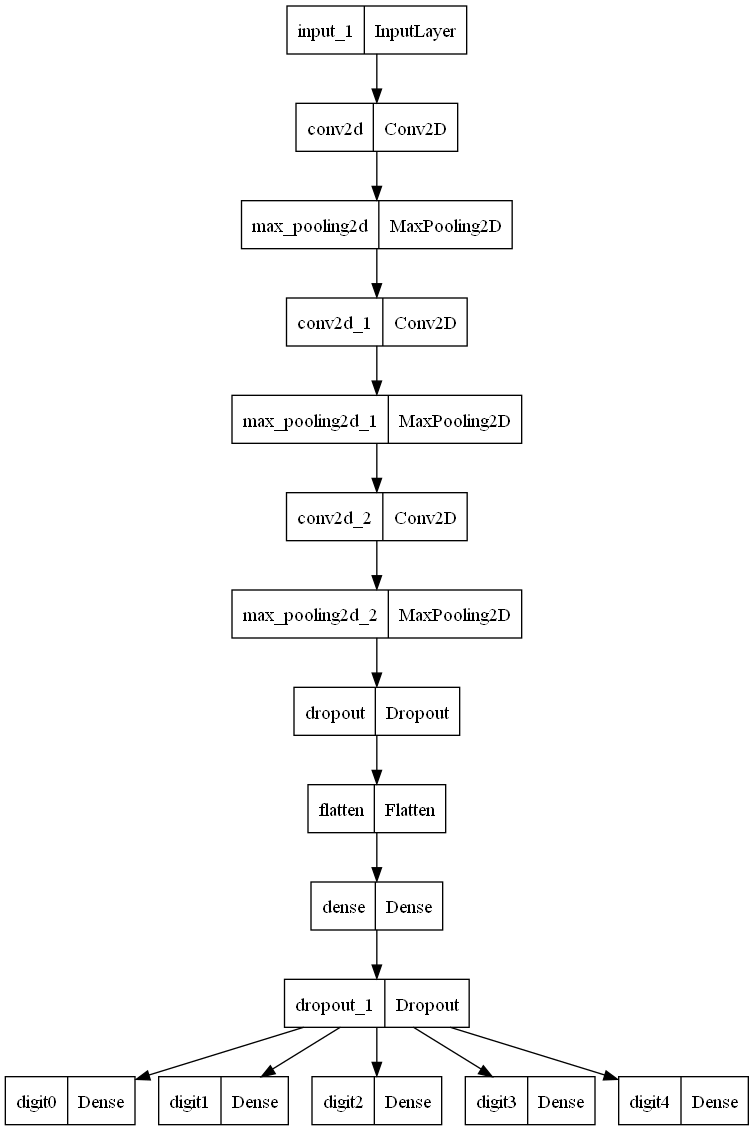

In [13]:
keras.utils.plot_model(model, 'modelo_cnn_deepCaptcha.png') # imprimimos el modelo

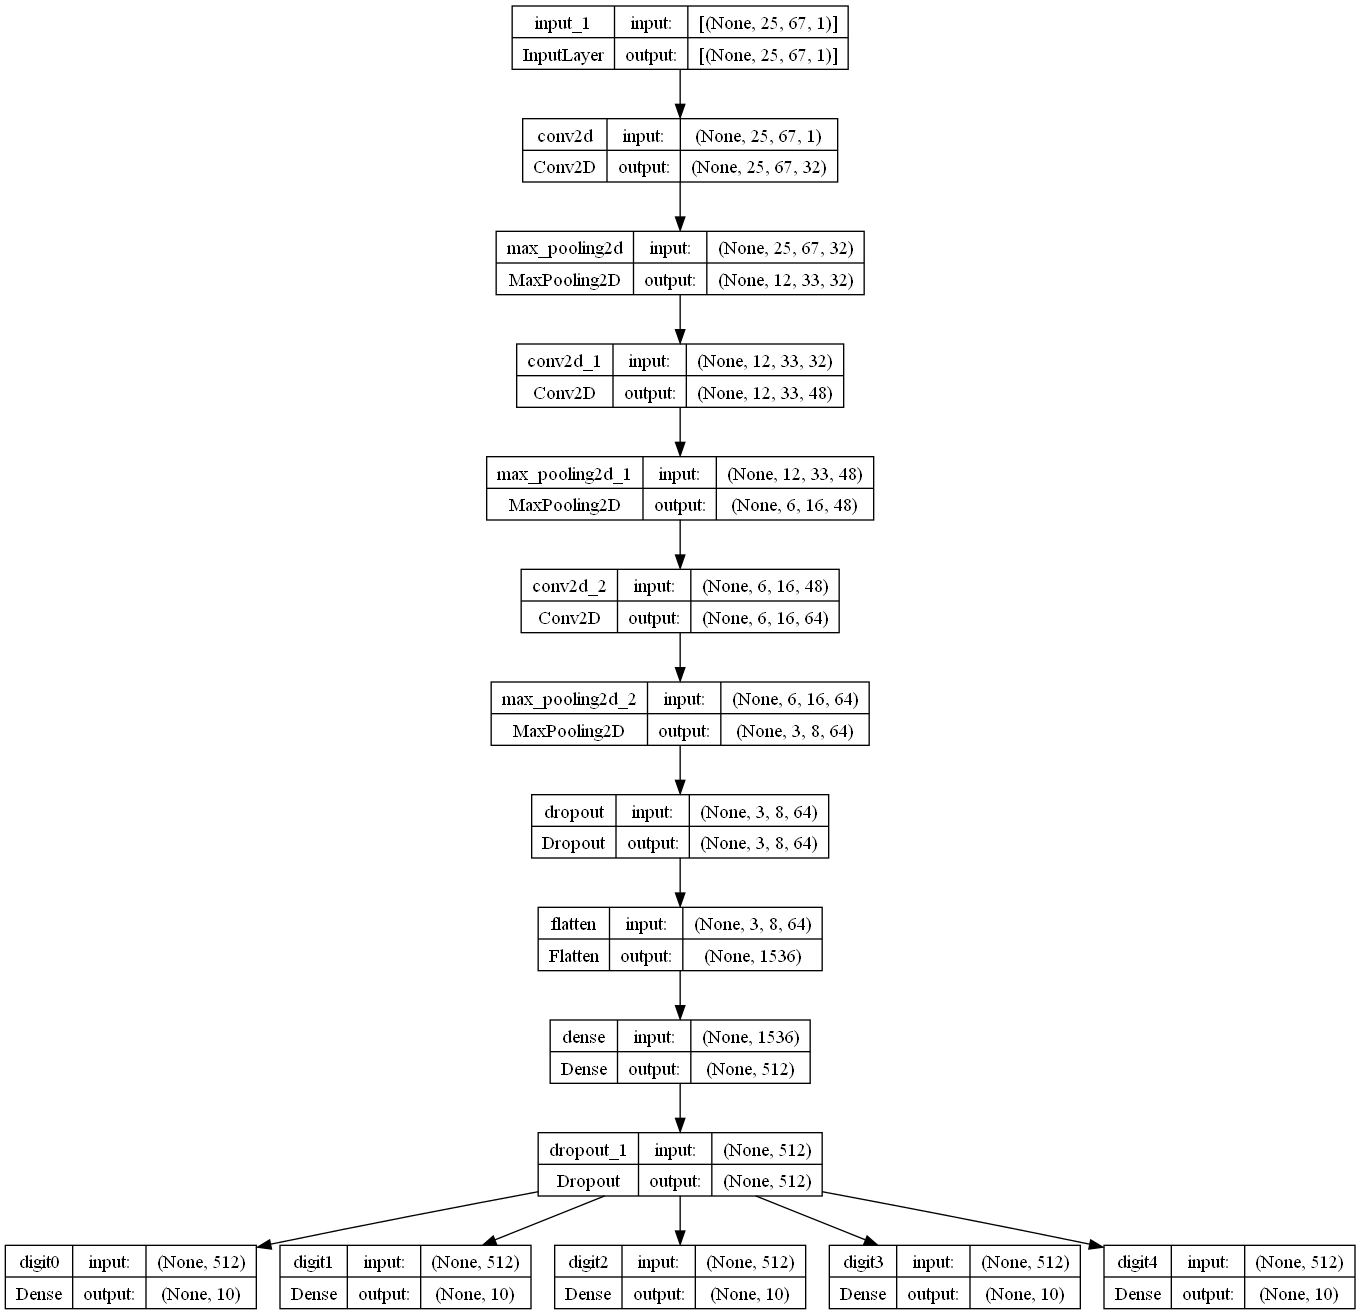

In [14]:
keras.utils.plot_model(model, 'modelo_cnn_deepCaptcha_con_info.png', show_shapes=True) # imprimimos el modelo con información

In [15]:
# definimos variables para guardar el historial de entrenamiento y validación

hist_train_loss_digit = {i:[] for i in range(5)} # inicializamos el historial de pérdida de entrenamiento por dígito
hist_test_loss_digit = {i:[] for i in range(5)} # inicializamos el historial de pérdida de validación por dígito

hist_train_acc_digit = {i:[] for i in range(5)} # inicializamos el historial de precisión de entrenamiento por dígito
hist_test_acc_digit = {i:[] for i in range(5)}  # inicializamos el historial de precisión de validación por dígito

hist_train_loss = [] # inicializamos el historial de pérdida de entrenamiento
hist_test_loss = [] # inicializamos el historial de pérdida de validación

hist_train_acc = [] # inicializamos el historial de precisión de entrenamiento
hist_test_acc = [] # inicializamos el historial de precisión de validación

In [16]:
# Definimos la variable que guarda la precisión por dígito

digit_acc = [[] for _ in range(NUM_OF_LETTERS)] # inicializamos la precisión por dígito
val_digit_acc = [[] for _ in range(NUM_OF_LETTERS)] # inicializamos la precisión por dígito
loss = [] # inicializamos la pérdida
val_loss = [] # inicializamos la pérdida

<a id="entrenamiento"></a>

### 3.5 Entrenamiento del modelo

Esta sección tardo aproximadamente: 17 minutos con 58 segundos

En la imagen pueden ver la carga del CPU y de la GPU:

<img src="images/ejecucion_captcha_numerico.png" height="600px">

In [17]:
# Entrenamos el modelo
history = model.fit(x_train, s_train, # datos de entrenamiento
                    batch_size=BATCH_SIZE, # tamaño del batch
                    epochs=EPOCHS, # número de épocas
                    verbose=1, # mostrar información del entrenamiento
                    validation_data=(x_test, s_test) # datos de validación
                   )

Epoch 1/50
1702/1702 [==============================] - 27s 13ms/step - loss: 0.8818 - digit0_loss: 0.1440 - digit1_loss: 0.1942 - digit2_loss: 0.2079 - digit3_loss: 0.1899 - digit4_loss: 0.1458 - digit0_accuracy: 0.6778 - digit1_accuracy: 0.5666 - digit2_accuracy: 0.5348 - digit3_accuracy: 0.5793 - digit4_accuracy: 0.6728 - val_loss: 0.1958 - val_digit0_loss: 0.0175 - val_digit1_loss: 0.0499 - val_digit2_loss: 0.0603 - val_digit3_loss: 0.0487 - val_digit4_loss: 0.0194 - val_digit0_accuracy: 0.9777 - val_digit1_accuracy: 0.9367 - val_digit2_accuracy: 0.9202 - val_digit3_accuracy: 0.9330 - val_digit4_accuracy: 0.9753
Epoch 2/50
1702/1702 [==============================] - 21s 13ms/step - loss: 0.2084 - digit0_loss: 0.0235 - digit1_loss: 0.0505 - digit2_loss: 0.0591 - digit3_loss: 0.0502 - digit4_loss: 0.0251 - digit0_accuracy: 0.9704 - digit1_accuracy: 0.9336 - digit2_accuracy: 0.9208 - digit3_accuracy: 0.9317 - digit4_accuracy: 0.9684 - val_loss: 0.0690 - val_digit0_loss: 0.0066 - val_

In [18]:
def plot_diagram(digit_acc_now, val_digit_acc_now, loss_now, val_loss_now): # grafica el entrenamiento
    global digit_acc, val_digit_acc, loss, val_loss # definimos las variables globales
    
    for i in range(NUM_OF_LETTERS): # iteramos sobre los dígitos
        digit_acc[i].extend(digit_acc_now[i]) # agregamos la precisión de entrenamiento del dígito i
        val_digit_acc[i].extend(val_digit_acc_now[i]) # agregamos la precisión de validación del dígito i
    loss.extend(loss_now) # agregamos la pérdida de entrenamiento
    val_loss.extend(val_loss_now) # agregamos la pérdida de validación
    
    for i in range(NUM_OF_LETTERS): # iteramos sobre los dígitos
        s = {0:'First', 1:'Second', 2:'Third', 3:'Fourth', 4:'Fifth'}[i] # obtenemos el nombre del dígito
        # plt.plot(val_digit_acc[i], label='%s Digit Train' % s) # graficamos la precisión de entrenamiento del dígito i
        plt.plot(digit_acc[i], label='%s Digit Test' % s) # graficamos la precisión de validación del dígito i

    plt.title('Model accuracy') # título de la gráfica
    plt.ylabel('Accuracy') # etiqueta del eje y
    plt.xlabel('Epoch') # etiqueta del eje x
    plt.legend() # imprimimos la leyenda
    plt.show() # imprimimos la gráfica

    for i in range(NUM_OF_LETTERS): # iteramos sobre los dígitos
        s = {0:'First', 1:'Second', 2:'Third', 3:'Fourth', 4:'Fifth'}[i] # obtenemos el nombre del dígito
        plt.plot(val_digit_acc[i], label='%s Digit Train' % s) # graficamos la precisión de entrenamiento del dígito i
        # plt.plot(digit_acc[i], label='%s Digit Test' % s) # graficamos la precisión de validación del dígito i

    plt.title('Model accuracy') # título de la gráfica
    plt.ylabel('Accuracy') # etiqueta del eje y
    plt.xlabel('Epoch') # etiqueta del eje x
    plt.legend() # imprimimos la leyenda
    plt.show() # imprimimos la gráfica



    # Plot training & validation loss values
    plt.plot(val_loss, label='Train') # graficamos la pérdida de entrenamiento
    plt.plot(loss, label='Test') # graficamos la pérdida de validación
    plt.title('Model loss') # título de la gráfica
    plt.ylabel('Loss') # etiqueta del eje y
    plt.xlabel('Epoch') # etiqueta del eje x
    plt.legend() # imprimimos la leyenda
    plt.show() # imprimimos la gráfica

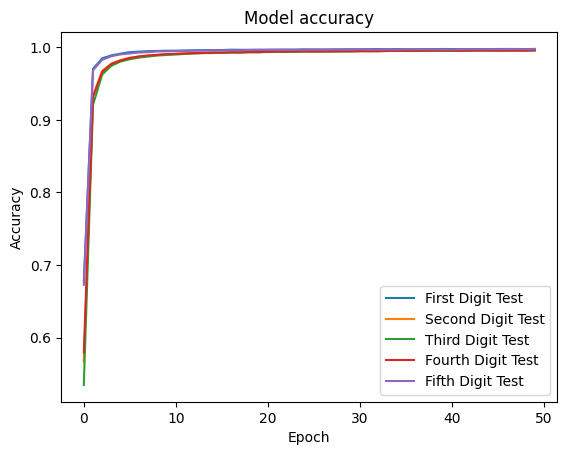

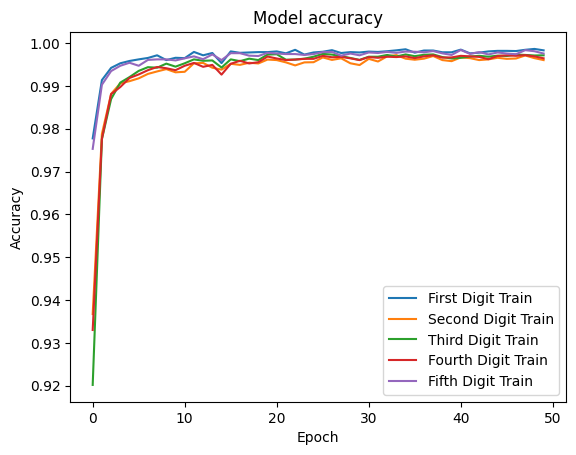

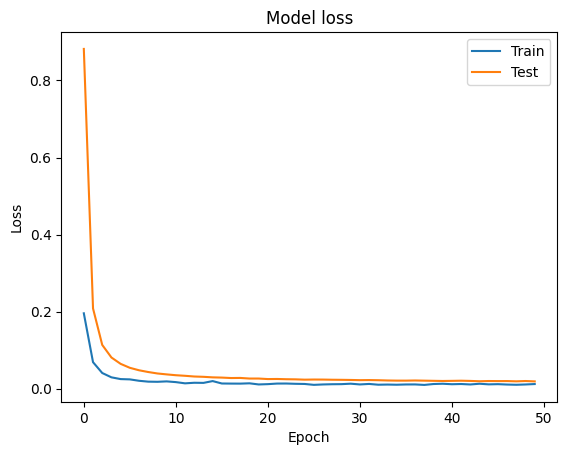

In [19]:
plot_diagram( # graficamos el entrenamiento
    
    [history.history['digit%d_accuracy' % i] for i in range(NUM_OF_LETTERS)], # precisión de entrenamiento por dígito
    [history.history['val_digit%d_accuracy' % i] for i in range(NUM_OF_LETTERS)], # precisión de validación por dígito
    history.history['loss'], # pérdida de entrenamiento
    history.history['val_loss'], # pérdida de validación
)

In [20]:
# Save model and weights
if not os.path.isdir(save_dir): # si el directorio de modelos no existe
    os.makedirs(save_dir) # creamos el directorio de modelos
model_path = os.path.join(save_dir, model_name) # generamos el path del modelo
model.save(model_path) # guardamos el modelo
print('Saved trained model at %s ' % model_path) # imprimimos que guardamos el modelo

Saved trained model at e:\Especializacion_IA_UBA\Cursadas\Intro_IA\captcha\saved_models\keras_cifar10_trained_model.h5 


In [21]:
# Score trained model.
scores = model.evaluate(x_train, s_train, verbose=1) # evaluamos el modelo
print('Train loss:     %f' % np.mean(scores[0:5])) # imprimimos la pérdida de entrenamiento
acc = 1. # inicializamos la precisión de entrenamiento
for i in range(5): # iteramos sobre los dígitos
    acc *= scores[6+i] # multiplicamos la precisión de entrenamiento por la precisión de entrenamiento del dígito i
print('Train accuracy: %.2f' % (acc * 100.)) # imprimimos la precisión de entrenamiento

6805/6805 [==============================] - 34s 5ms/step - loss: 0.0042 - digit0_loss: 4.2055e-04 - digit1_loss: 0.0012 - digit2_loss: 0.0011 - digit3_loss: 9.7838e-04 - digit4_loss: 5.9654e-04 - digit0_accuracy: 0.9994 - digit1_accuracy: 0.9986 - digit2_accuracy: 0.9990 - digit3_accuracy: 0.9989 - digit4_accuracy: 0.9992
Train loss:     0.001564
Train accuracy: 99.51


In [22]:
scores = model.evaluate(x_test, s_test, verbose=1) # evaluamos el modelo
print('Test loss:     %f' % np.mean(scores[0:5])) # imprimimos la pérdida de validación
acc = 1. # inicializamos la precisión de validación
for i in range(5): # iteramos sobre los dígitos
    acc *= scores[6+i] # multiplicamos la precisión de validación por la precisión de validación del dígito i
print('Test accuracy: %.2f' % (acc * 100.)) # imprimimos la precisión de validación

756/756 [==============================] - 4s 5ms/step - loss: 0.0123 - digit0_loss: 0.0013 - digit1_loss: 0.0033 - digit2_loss: 0.0032 - digit3_loss: 0.0025 - digit4_loss: 0.0019 - digit0_accuracy: 0.9983 - digit1_accuracy: 0.9960 - digit2_accuracy: 0.9971 - digit3_accuracy: 0.9964 - digit4_accuracy: 0.9976
Test loss:     0.004523
Test accuracy: 98.56
